In [1]:
#From SAV to LOVE

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)


### Задача № 1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
Path_Energy = 'PJME_MW.csv'

data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head(7)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0
2002-01-01,06:00:00,28654.0,2002,1,1,1,1,1,1,6,1,0,0
2002-01-01,07:00:00,29308.0,2002,1,1,1,1,1,1,7,1,0,0


In [4]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [5]:
d_data=data.resample('D').mean()
d_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0


In [6]:
d_data.shape

(6059, 12)

Text(0.5, 1.0, 'Потребление Энергии')

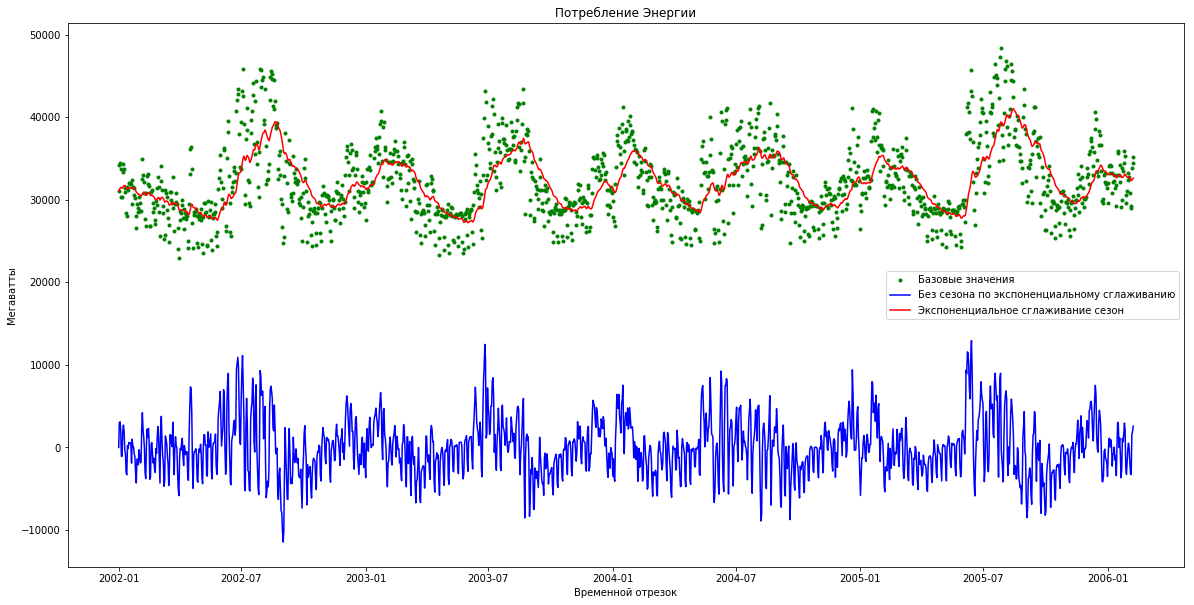

In [7]:

data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 10))
plt.plot(d_data.index[:1500], d_data['PJME_MW'].values[:1500], '.b',label='Базовые значения', color = 'g')

plt.plot(d_data.index[:1500],d_data['PJME_MW'].values[:1500] - data_exp_1[:1500] , color = 'b', label="Без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:1500],data_exp_1[:1500] , color = 'red', label="Экспоненциальное сглаживание сезон");

plt.xlabel('Временной отрезок')
plt.ylabel('Мегаватты')
plt.legend()
plt.title('Потребление Энергии')

In [8]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.365362138561911,
 4.2829746153965626e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

In [9]:
d_data.head(7)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0
2002-01-06,30323.583333,2002.0,1.0,6.0,1.0,6.0,1.0,6.0,11.5,0.0,0.0,0.0
2002-01-07,33333.833333,2002.0,1.0,7.0,1.0,7.0,2.0,0.0,11.5,0.0,0.0,0.0


In [10]:
df = d_data.copy()
df.head(7)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0
2002-01-06,30323.583333,2002.0,1.0,6.0,1.0,6.0,1.0,6.0,11.5,0.0,0.0,0.0
2002-01-07,33333.833333,2002.0,1.0,7.0,1.0,7.0,2.0,0.0,11.5,0.0,0.0,0.0


In [11]:
 # добавим историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0.0
df.iloc[1:,12]=df.iloc[:-1,0].values
df['t1']=0.0
df.iloc[2:,13]=df.iloc[:-2,0].values
df['t2']=0.0
df.iloc[3:,14]=df.iloc[:-3,0].values
df.fillna(0)
# добавим сглаживание 
df['exp_0_05'] = exponential_smoothing(df['PJME_MW'], 0.05)
df['diff1'] = 0.0
df['diff1'].iloc[1:] = df.iloc[1:,0].values - df.iloc[:-1,0].values
df.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,t,t1,t2,exp_0_05,diff1
Date,,,,,,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,31080.739130,0.000000
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0,31080.739130,0.000000,0.000000,31239.779257,3180.802536
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0,34261.541667,31080.739130,0.000000,31403.384044,250.333333
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0,34511.875000,34261.541667,31080.739130,31518.987759,-796.416667
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0,33715.458333,34511.875000,34261.541667,31463.294621,-3310.333333


In [12]:
df.index

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10',
               ...
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01',
               '2018-08-02', '2018-08-03'],
              dtype='datetime64[ns]', name='Date', length=6059, freq='D')

In [13]:
df.columns

Index(['PJME_MW', 'year', 'month', 'dayofmonth', 'quarter', 'dayofyear',
       'weekofyear', 'dayofweek', 'hour', 'is_holiday', 'is_prev_holiday',
       'is_next_holiday', 't', 't1', 't2', 'exp_0_05', 'diff1'],
      dtype='object')

In [14]:

scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()





In [15]:
df1 = df[['PJME_MW', 'is_holiday', 't', 't1', 't2', 'exp_0_05', 'diff1']]
df1.head()

,PJME_MW,is_holiday,t,t1,t2,exp_0_05,diff1
Date,,,,,,,
2002-01-01,31080.739130,1.0,0.000000,0.000000,0.000000,31080.739130,0.000000
2002-01-02,34261.541667,0.0,31080.739130,0.000000,0.000000,31239.779257,3180.802536
2002-01-03,34511.875000,0.0,34261.541667,31080.739130,0.000000,31403.384044,250.333333
2002-01-04,33715.458333,0.0,34511.875000,34261.541667,31080.739130,31518.987759,-796.416667
2002-01-05,30405.125000,0.0,33715.458333,34511.875000,34261.541667,31463.294621,-3310.333333


In [16]:
train, test = split_data( df, '2018-03-31')

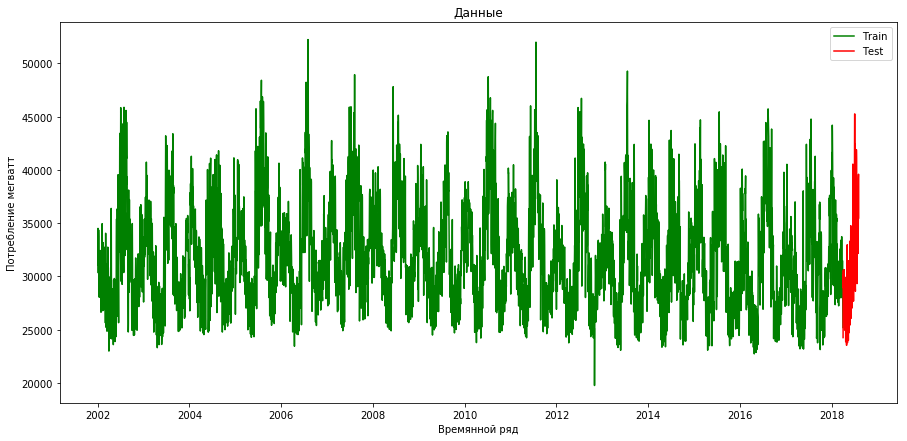

In [17]:
h=1
X_train = train.iloc[:-h,:]
y_train = train[df.columns[0]].values[h:]
X_test = test.iloc[:-h,:]
y_test = test[df.columns[0]].values[h:]

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Времянной ряд')
plt.ylabel('Потребление мегватт')
plt.plot(train.index.get_level_values('Date'),train[df.columns[0]], label='Train', color='g' )
plt.plot(test.index.get_level_values('Date'),test[df.columns[0]], label='Test', color ='r')
plt.title( 'Данные' )
plt.legend()
plt.show()

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


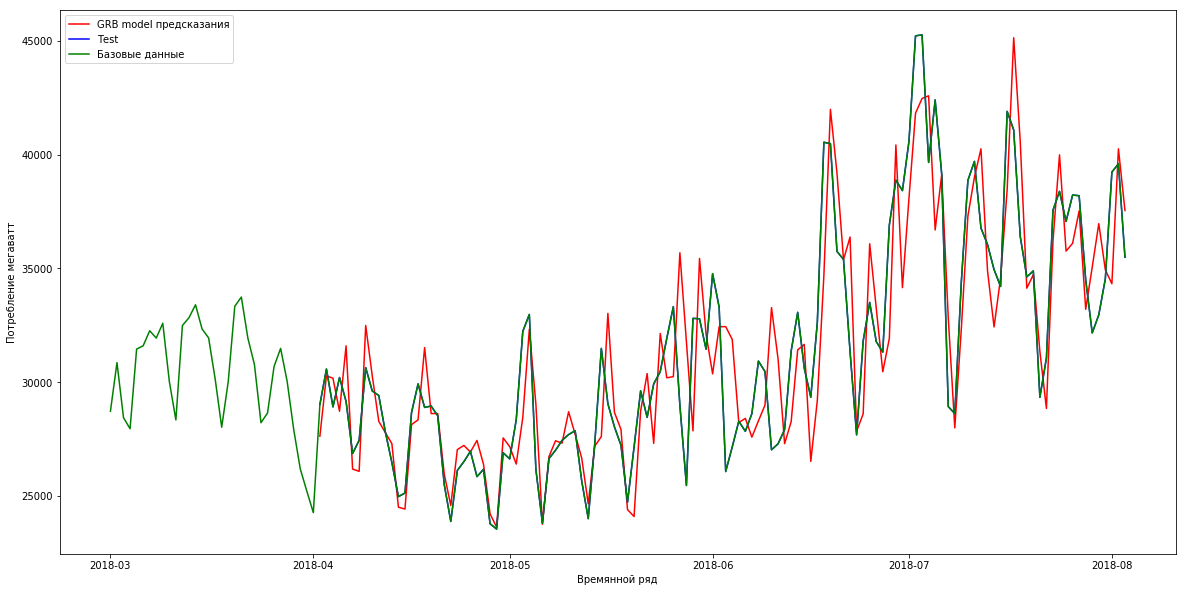

средняя ошибка в %:   6.008378259808353 %
r2:  0.743552770046652 


In [19]:

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train, y_train ) 
X_test_pred_gb = model_gb.predict(X_test)

plt.figure( figsize=( 20, 10 ))

plt.xlabel('Времянной ряд')
plt.ylabel('Потребление мегаватт')
plt.plot(test.index[h:],X_test_pred_gb, label='GRB model предсказания', color='r' )
plt.plot(test.index[h:],y_test, label='Test', color='b')
plt.plot(df.loc['2018-03-01':].index, df.loc['2018-03-01':]['PJME_MW'], label='Базовые данные',color='g')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_gb)

print('средняя ошибка в %:  ', er_g, '%')
print(f'r2:  {r2_score(y_test,X_test_pred_gb)} ')

In [20]:
er_g = mean_absolute_percentage_error(y_true=y_test[:30], y_pred=X_test_pred_gb[:30])

print('средняя ошибка на первый прогнозируемый месяц: ', er_g, '%')

средняя ошибка на первый прогнозируемый месяц:  3.1120148783230124 %


In [21]:
r2_score(y_test[:30],X_test_pred_gb[:30])

0.7070959767809082

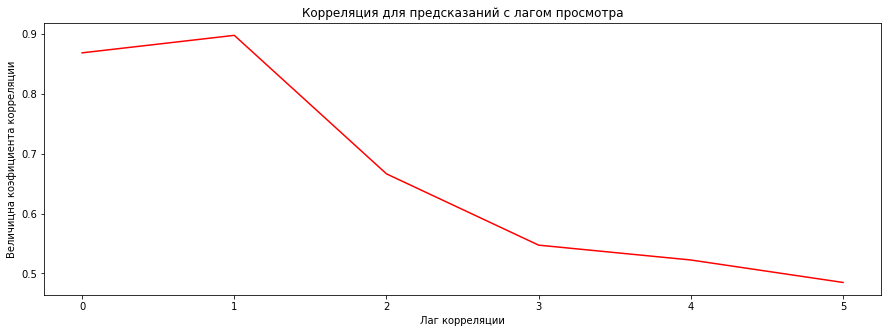

In [22]:
lag=5
p_cor=[np.corrcoef( y_test, X_test_pred_gb)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], X_test_pred_gb[(i+1):])[1,0]
    p_cor.append(c)    

plt.figure( figsize=( 15, 5 ))
plt.plot(np.array(p_cor), color='r' ) 
plt.xlabel('Лаг корреляции')
plt.ylabel('Величицна коэфициента корреляции')
plt.title('Корреляция для предсказаний с лагом просмотра')
plt.show()

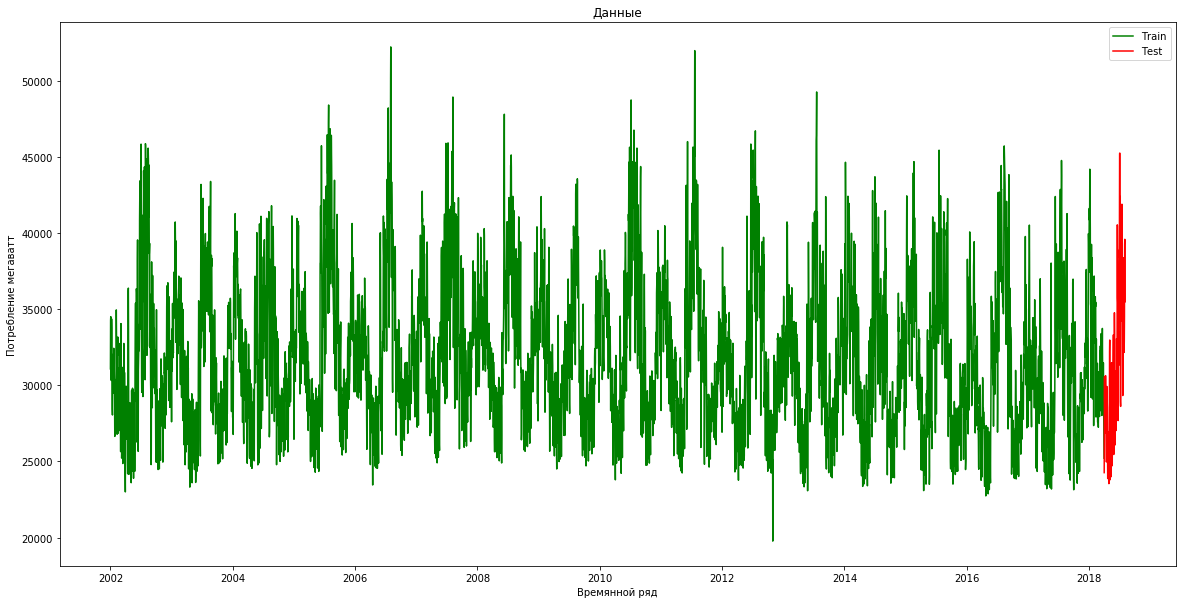

In [23]:
h=10
X_train = train.iloc[:-h,:]
y_train = train[df.columns[0]].values[h:]
X_test = test.iloc[:-h,:]
y_test = test[df.columns[0]].values[h:]

plt.figure( figsize=( 20, 10 ))
plt.xlabel('Времянной ряд')
plt.ylabel('Потребление мегаватт')
plt.plot(train.index.get_level_values('Date'),train[df.columns[0]], label='Train', color='g' )
plt.plot(test.index.get_level_values('Date'),test[df.columns[0]], label='Test', color='r')
plt.title( 'Данные' )
plt.legend()
plt.show()

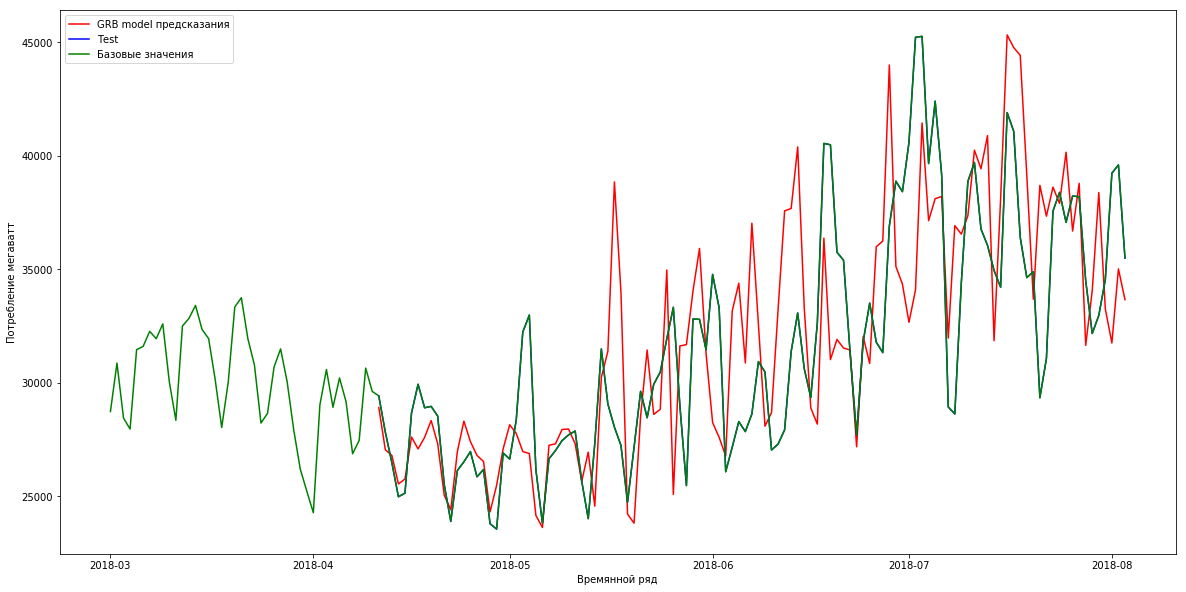

средняя ошибка в %:   9.576825723328767 %
r2:  0.3642557913722344 


In [24]:

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train, y_train ) 
X_test_pred_gb = model_gb.predict(X_test)

plt.figure( figsize=( 20, 10 ))

plt.xlabel('Времянной ряд')
plt.ylabel('Потребление мегаватт')
plt.plot(test.index[h:],X_test_pred_gb, label='GRB model предсказания', color='r' )
plt.plot(test.index[h:],y_test, label='Test', color='b')
plt.plot(df.loc['2018-03-01':].index, df.loc['2018-03-01':]['PJME_MW'], label='Базовые значения', color='g')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_gb)

print('средняя ошибка в %:  ', er_g, '%')
print(f'r2:  {r2_score(y_test,X_test_pred_gb)} ')

In [25]:
er_g = mean_absolute_percentage_error(y_true=y_test[:30], y_pred=X_test_pred_gb[:30])

print('средняя ошибка на первый прогнозируемый месяц:  ', er_g, '%')

средняя ошибка на первый прогнозируемый месяц:   4.114209849900251 %


In [26]:
r2_score(y_test[:30],X_test_pred_gb[:30])

0.35276491993201076

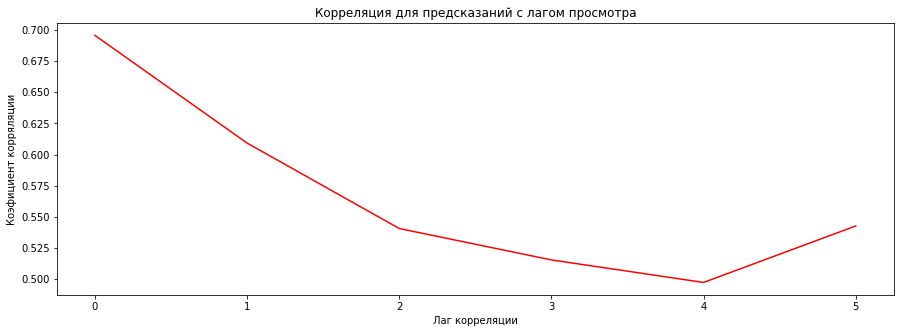

In [27]:
lag=5
p_cor=[np.corrcoef( y_test, X_test_pred_gb)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], X_test_pred_gb[(i+1):])[1,0]
    p_cor.append(c)    
plt.figure( figsize=( 15, 5 ))
plt.plot(np.array(p_cor),color='r' ) 
plt.xlabel('Лаг корреляции')
plt.ylabel('Коэфициент корряляции')
plt.title('Корреляция для предсказаний с лагом просмотра')
plt.show()

### Задание № 2. Оцените ошибки моделей из п.1 .

### Задание № 3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

При глубине прогнозирования h = 1: Средняя ошибка в %:   6.00 %,  r2:  0.74 
При условии проверки только  за первый месяц то средняя ошибка уменьшается почти в 2 раза:
Средняя ошибка на первый прогнозируемый месяц:  3.11 %, но при этом r2 уменьшается  (0.70)

При глубине прогнозирования h = 10 ошибка возрастает, а r2  сильно существенно падает: 
Средняя ошибка в процентном отношении:   9.57 %, r2:  0.36
При условии проверки только  за первый месяц то средняя ошибка уменьшается более чем в 2 раза:
Средняя ошибка на первый прогнозируемый месяц:   4.11 %, но  r2  уменьшается незначительно (0.35)

#### При увеличении глубины прогнозирования точность прогнозирования существенно падает

-----


### Задача № 4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).
    
 Характер ряда циклический и сезонный, то есть есть малый цикл изменения температуры ежедневный наложенный на большой цикл - сезон (то есть временя года).   
    
    
    б) Количество денег, которые тратят покупатели в интернет магазине.
    
Стационарный с небольшим трендом (за счет рекламы и внешних факторов постоянно увеличивающийся, хотя иногда и может немного падать). Скорее всего наблюдается сезонность связанная с ежегодними прадниками. Суточная активность усредняется если брать например общемировые онлайн-покупки, хотя возможно из-за неравномерного распределения более богатых стран по часовым поясам, возможно есть еще и суточные циклы
    
    в) Вес растущего котенка.
Стационарный, потому что в основном котенок только прибавляет в весе, хотя день ото дня может прибавлять по разному (иногда даже уменьшаться немного, например при болезни)
    
    г) Прирост объема деревьев в лесу от времени
Тренд с сезонностью (летом наростает больше чем зимой).Погода меняется, дожди или засуха, поэтому нарост может быть неоднородный.